# Parametric maps
This notebook demonstrates how parametric maps can be made. In such parametric images, pixel intensity corresponds to  measurements of the objects, for example area.

In [1]:
import numpy as np
import pyclesperanto_prototype as cle
from skimage.io import imread, imsave
from skimage.measure import regionprops, regionprops_table
from skimage.util import map_array
from napari_simpleitk_image_processing import label_statistics

Starting point for drawing parametric maps is always a label image.

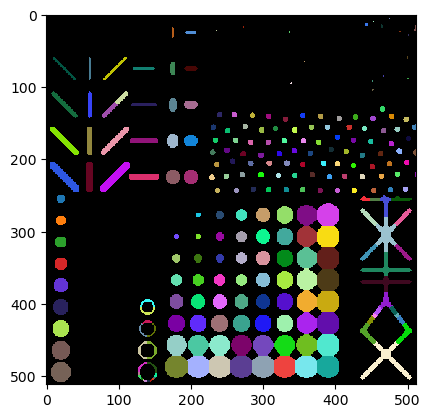

In [2]:
binary = cle.artificial_objects_2d()
labels = cle.pull(cle.voronoi_otsu_labeling(binary, spot_sigma=5))

cle.imshow(labels, labels=True)

## Parametric maps using scikit-image
You can also compute your own measurement for each object and then visualize it in a parametric map image. Consider using [scikit-image's `regionprops()`](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops) for computing the measurements.

In [3]:
statistics_table = regionprops_table(labels, properties=('label', 'area',))

## Area map

C:\Users\haase\mambaforge\envs\tea2024\lib\site-packages\pyclesperanto_prototype\_tier9\_imshow.py:46: UserWarning: The imshow parameter color_map is deprecated. Use colormap instead.
  warnings.warn("The imshow parameter color_map is deprecated. Use colormap instead.")


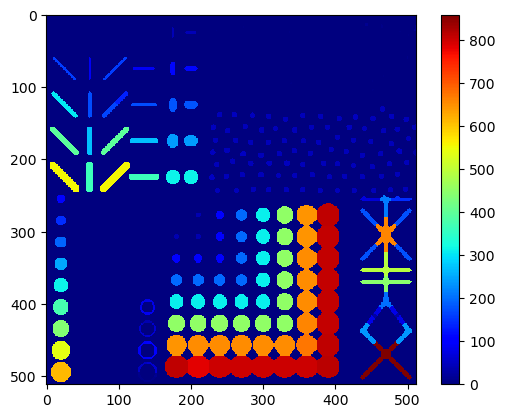

In [4]:
remapped = map_array(
        labels,
        statistics_table['label'],
        statistics_table['area'],
        )

cle.imshow(remapped, colorbar=True, color_map="jet")

## Pixel count map
pyclesperanto comes with some maps built-in. For example the pixel count map derived from a label image expresses area or volume of objects in colour.

C:\Users\haase\mambaforge\envs\tea2024\lib\site-packages\pyclesperanto_prototype\_tier9\_imshow.py:46: UserWarning: The imshow parameter color_map is deprecated. Use colormap instead.
  warnings.warn("The imshow parameter color_map is deprecated. Use colormap instead.")


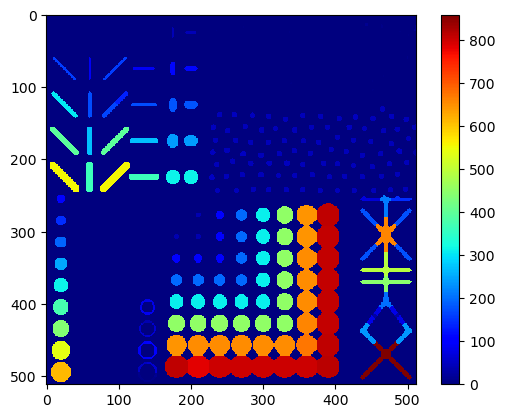

In [5]:
pixel_count_map = cle.label_pixel_count_map(labels)

cle.imshow(pixel_count_map, color_map='jet', colorbar=True)

## Parametric maps using SimpleITK-based measurements
Furthermore, also [SimpleITK](https://simpleitk.readthedocs.io/) comes with quantitative measurements for labeled images. For convenience reasons, we will use the scriptable napari plugin [napari-simpleitk-image-processing](https://github.com/haesleinhuepf/napari-simpleitk-image-processing) for deriving measurements.

In [6]:
statistics_sitk = label_statistics(labels, labels, size=True, shape=True, perimeter=True, intensity=False)

print(statistics_sitk.keys())

Index(['label', 'elongation', 'feret_diameter', 'flatness', 'roundness',
       'equivalent_ellipsoid_diameter_0', 'equivalent_ellipsoid_diameter_1',
       'equivalent_spherical_perimeter', 'equivalent_spherical_radius',
       'number_of_pixels', 'number_of_pixels_on_border', 'perimeter',
       'perimeter_on_border', 'perimeter_on_border_ratio'],
      dtype='object')


In [7]:
statistics_sitk

,label,elongation,feret_diameter,flatness,roundness,equivalent_ellipsoid_diameter_0,equivalent_ellipsoid_diameter_1,equivalent_spherical_perimeter,equivalent_spherical_radius,number_of_pixels,number_of_pixels_on_border,perimeter,perimeter_on_border,perimeter_on_border_ratio
0,1,1.000000,11.661904,1.000000,1.023476,11.780624,11.780624,37.009923,5.890312,109,0,36.161012,0.0,0.000000
1,2,1.000000,13.416408,1.000000,1.027991,13.587484,13.587484,42.686341,6.793742,145,0,41.524046,0.0,0.000000
2,3,1.000000,15.620499,1.000000,1.002829,15.675944,15.675944,49.247432,7.837972,193,0,49.108522,0.0,0.000000
3,4,1.000000,17.888544,1.000000,1.026916,17.805523,17.805523,55.937700,8.902761,249,0,54.471556,0.0,0.000000
4,5,1.000000,20.000000,1.000000,1.010632,19.963065,19.963065,62.715819,9.981533,313,0,62.056032,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,244,1.732051,2.236068,1.732051,1.014350,1.917166,3.320629,7.926655,1.261566,5,0,7.814513,0.0,0.000000
244,245,3.822108,8.062258,3.822108,0.773499,2.515825,9.615753,15.451894,2.459245,19,9,19.976625,9.0,0.450527
245,246,1.510461,8.246211,1.510461,0.924421,5.878848,8.879771,22.698484,3.612576,41,9,24.554261,9.0,0.366535
246,247,2.159943,8.062258,2.159943,0.910818,4.205276,9.083158,19.416259,3.090194,30,9,21.317383,9.0,0.422191


## Number of pixels map

C:\Users\haase\mambaforge\envs\tea2024\lib\site-packages\pyclesperanto_prototype\_tier9\_imshow.py:46: UserWarning: The imshow parameter color_map is deprecated. Use colormap instead.
  warnings.warn("The imshow parameter color_map is deprecated. Use colormap instead.")


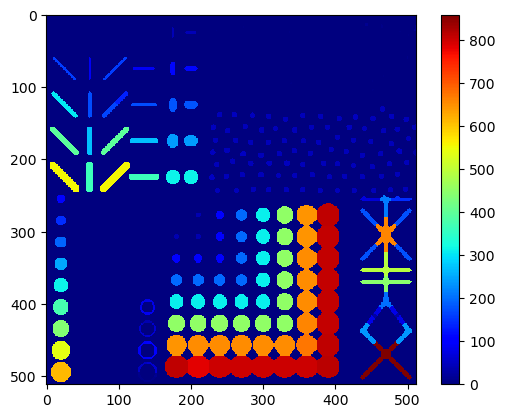

In [8]:
# we're appending a [0] for the "measurement" of the background and attach all values behind
number_of_pixels = [0] + statistics_sitk['number_of_pixels'].tolist()

number_of_pixels_map = cle.replace_intensities(labels, number_of_pixels)

cle.imshow(number_of_pixels_map, colorbar=True, color_map="jet")

## Aspect ratio map

In [9]:
statistics = regionprops(labels)

In [10]:
# we're appending a [0] for the "measurement" of the background and attach all values behind
aspect_ratio = [0]

for s in statistics:
    if s.minor_axis_length:
        aspect_ratio.append(s.major_axis_length / s.minor_axis_length)
    else:
        aspect_ratio.append(0) # note: an aspect ratio of 0 is an "invalid" value

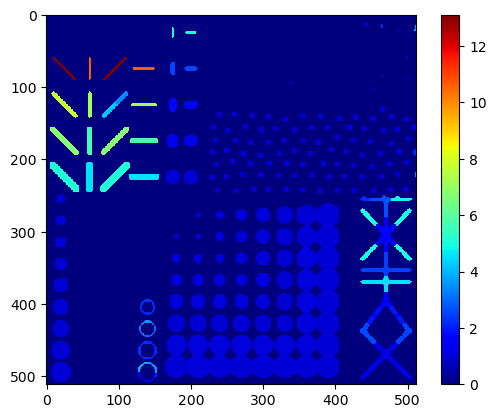

In [11]:
aspect_ratio_map = cle.replace_intensities(labels, aspect_ratio)

cle.imshow(aspect_ratio_map, colorbar=True, color_map="jet")

## Exercise
Draw a parametric map image of Feret's diameter.